<a href="https://colab.research.google.com/github/campusplage/multidimensional-compte-rendus/blob/master/TP2_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse de données multidimensionnelles
## BRUN Fleur & FRANC Priscille

# TP 2: Utiliser l'analyse en composantes principales de `scikit-learn`




---
Ce notebook contient votre compte-rendu pour le TP2.
Il s'agit d'un travail que nous commencerons ensemble, puis que vous pouvez continuer de votre côté jusqu'à la date limite de soumission qui est le __lundi 2 décembre à 6h__.

---

# Manipuler github et soumettre votre travail (5 points)

> Vous serez notés sur votre aptitude à correctement soumettre votre travail par le biais d'un gestionnaire de version.
  __La procédure à suivre sera la même pour tous les TP. Sa mise en œuvre correspond au quart de la note.__

## b. Ouvrir votre travail

Vous avez deux options pour ouvrir votre notebook:
  * Sur la page de votre répo, cliquez dessus puis `open in colab`
  * directement sur [colab.research.google.com](colab.research.google.com), cliquez sur `File` $\rightarrow$ `Open notebook`, puis choisissez l'onglet `github` et retrouvez le colab après avoir sélectionné le bon répo.


## a. Sauvegarder votre travail

Vous êtes invités à régulièrement sauvegarder votre travail sur le répo (et non pas sur votre google drive uniquement).

Pour cela:
1. Cliquez sur `File` $\rightarrow$ `Save a copy in github`
2. Si c'est la première fois que vous le faites, autorisez l'accès à google colab l'accès à votre compte github. Suivez simplement les instructions.
3. Ensuite, sur la page qui s'affiche, sélectionnez le répo de votre compte rendu, puis `OK`. Appelez votre notebook `TP1.ipynb`.
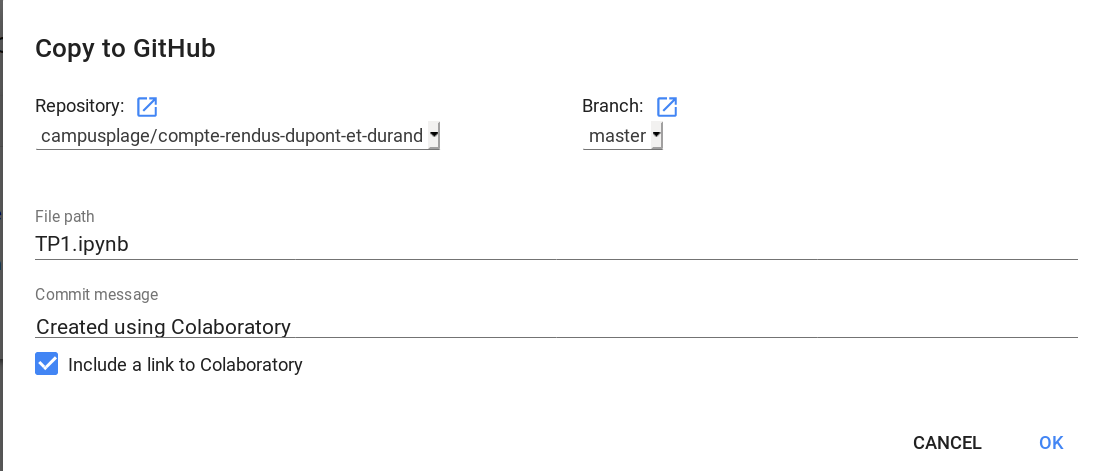

> Vous êtes chaleureusement invités à donner un message informatif pour décrire chaque `commit`, et donc à changer ce _created using colaboratory_ qui s'affiche par défaut. (Cela fera bien sûr partie des critères de notation).

## c. Récupérer une version plus ancienne

L'intérêt principal de travailler avec un gestionnaire de version comme git est de pouvoir à tout moment revenir en arrière !

Si vous en avez besoin, parcourez les différents _commits_ de votre répo, et chargez les fichiers correspondants.  
Tout est sauvegardé sur github ! C'est un énorme avantage par rapport à un google drive, un dropbox, un fichier en local, etc.

# 1. Charger et manipuler des données LFW (3 points)

## a. Téléchargement des données

Dans ce TP, nous allons travailler avec un autre ensemble de données provenant du challenge [_labeled faces in the wild_](http://vis-www.cs.umass.edu/lfw/). Il s'agit d'un ensemble de photos de visages en noir et blanc.

In [1]:
# différents imports utiles par la suite
import pandas
import sklearn
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Téléchargement des données
d = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

## b. Accès aux données

Dans la cellule précédente, nous avons téléchargé des données contenant un gros milliers d'images noires et blanc de visages d'hommes politiques.  

Ces données sont regroupées dans variable `data_dict`, qui est un _dictionnaire_ ([dict](https://docs.python.org/3/library/stdtypes.html#mapping-types-dict)).

> Un dictionnaire est une structure de donnée qui permet de regrouper plusieurs valeurs hétérogènes, un peu à la manière d'une ligne donnée d'un `DataFrame` de pandas.
>
> Par exemple, on peut définir le dictionnaire suivant:
> ```python
student = {'name':'Dupont',
           'first name': 'Jean',
           'age': 23,
           'marks': [10, 13, 15.5, 11]
           }
  ```
> Il est constitué de 4 entrées appelées _clés_ (keys), qu'on peut lister par la méthode du même nom:
> ```python
  student.keys()
  ```  
> Et  on peut accéder à une entrée donnée par l'opérateur `[]` ou bien par `.`:
>```python
student['age']
student.age
```


In [2]:
# listez les clés de la variable `d`
cles=d.keys()
cles

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

## c. Manipulations élémentaires de `ndarrays`

Affichez le type de toutes les entrées de `d`

> utilisez les fonctions `print` et `type` dans une boucle `for`

In [3]:
# Votre travail ici
for i in cles:
    print (i, type(d[i]))

data <class 'numpy.ndarray'>
images <class 'numpy.ndarray'>
target <class 'numpy.ndarray'>
target_names <class 'numpy.ndarray'>
DESCR <class 'str'>


Comme vous le voyez, les données sont des [`ndarray`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html), la structure de base de la bibliothèque `numpy` qu'on a déja vue.

Cette structure très puissante de données numériques permet de facilement faire des calculs et accédez à des données.

In [4]:
# Affichez la dimension de d.images (utilisez la propriété `shape` des `ndarrays`)
d.images.shape

# (comme on le voit, c'est un tableau 3D.)

(1560, 50, 37)

In [5]:
# créez les variables nb_samples, height et width correspondantes
# (indice: testez d'abord `a, b, c = [1, 2, 3] )
nb_samples, height, width=d.images.shape

Comme vous le constatez, `d.images` regroupe $1560$ images, chacune étant de dimensions $50\times 37=1850$ pixels.

In [6]:
# chaque ligne de `d.data` n'est rien d'autre que la version aplatie de l'image
# correspondante dans `d.images`. 
print('Are d.data[10] and d.images[10].flatten() the same ?',
      np.allclose(d.data[10], d.images[10].flatten()))
# (où on a rencontré la fonction `allclose` de numpy qui compare des `ndarray`
# et la méthode `flatten` qui applatie un `ndarray`)


# en fait, on aurait pu construire cette version applatie très simplement, avec 
# la méthode `reshape` des `ndarray`:
flattened =  d.images.reshape((nb_samples, height * width))
print('Is `flattened` equal to `d.data` ? ', 
      np.allclose(flattened, d.data))

Are d.data[10] and d.images[10].flatten() the same ? True
Is `flattened` equal to `d.data` ?  True


In [7]:
# Pour extraire les 10 premières images, il suffit de faire:
d.data[:10]

# Pour extraire les pixels 50...99 des 10 premières images:
d.data[:10, 50:100]
# Il s'agit d'une sélection dans la ndarray `data`. C'est elle même une ndarray.
# 
print(d.data[:10, 50:100].shape)

(10, 50)


Maintenant, voyons quel est le nom des personnes dans les $10$ premières images.

In [8]:
# Première solution: commentez chaque ligne

# Créer une boucle de 10 itérations, avec index = 0 jusqu'à 9
for index in range(10):
  # Afficher les noms associés aux cibles/images numérotées de 0 à 9.
  print(d.target_names[d.target[index]])

Tony Blair
Gerhard Schroeder
Donald Rumsfeld
George W Bush
George W Bush
Colin Powell
Ariel Sharon
George W Bush
Colin Powell
George W Bush


In [9]:
# Deuxième solution: supprimez la boucle, et affichez ces 10 premières `target` directement
# (indice: utilisez [] deux fois, de manière imbriquée)
print(d.target_names[d.target[0:10]])

['Tony Blair' 'Gerhard Schroeder' 'Donald Rumsfeld' 'George W Bush'
 'George W Bush' 'Colin Powell' 'Ariel Sharon' 'George W Bush'
 'Colin Powell' 'George W Bush']


## b. Affichage 


Nous définissons maintenant deux fonctions utilitaires:
* `plot_images` qui prend en entrée: des images sous forme de lignes, un titre à indiquer pour la figure, et qui se charge d'un affichage
* `shuffle` mélange un lot d'images. C'est utile pour ne pas tout le temps afficher les mêmes premières si on n'a pas envie

In [10]:
#fonction utilitaire pour réorganiser aléatoirement des images
def shuffle(images):
  result = images.copy()
  np.random.shuffle(result)
  return result

# définition d'une fonction d'affichage
def plot_images(images, title='', n_row=3, n_col=4, shuffle=True):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row+0.5))
    plt.suptitle(title)
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.95, hspace=0, wspace=0)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

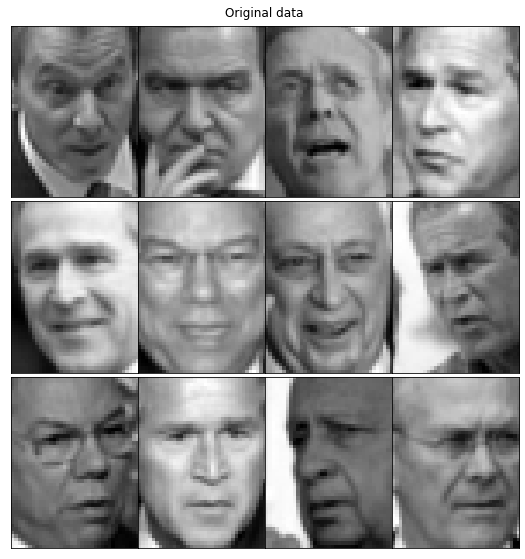

In [11]:
# Affichons les premières images
plot_images(d.data, 'Original data')

In [12]:
# Pour chaque tuple numero;nom de la liste des noms des personnes qui sont en photo,
#Afficher le numéro, le nom et le nombre de photos de cette personne dans la base de données
for (i, name) in enumerate(d.target_names):
  print('target %d, name: %s, number of matches: %d' % (i, name, np.sum(d.target == i)))

target 0, name: Ariel Sharon, number of matches: 77
target 1, name: Colin Powell, number of matches: 236
target 2, name: Donald Rumsfeld, number of matches: 121
target 3, name: George W Bush, number of matches: 530
target 4, name: Gerhard Schroeder, number of matches: 109
target 5, name: Hugo Chavez, number of matches: 71
target 6, name: Jacques Chirac, number of matches: 52
target 7, name: Jean Chretien, number of matches: 55
target 8, name: John Ashcroft, number of matches: 53
target 9, name: Junichiro Koizumi, number of matches: 60
target 10, name: Serena Williams, number of matches: 52
target 11, name: Tony Blair, number of matches: 144


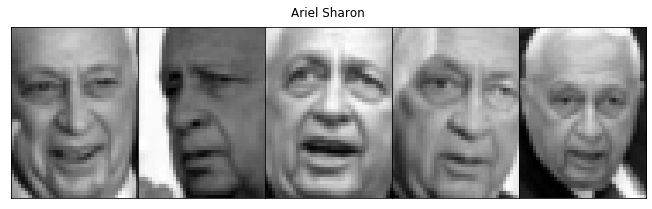

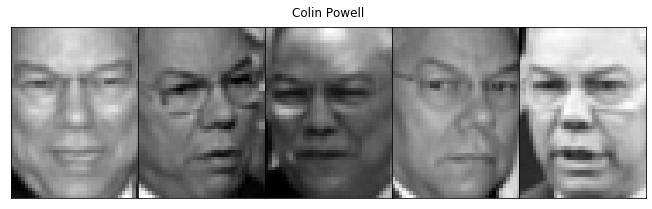

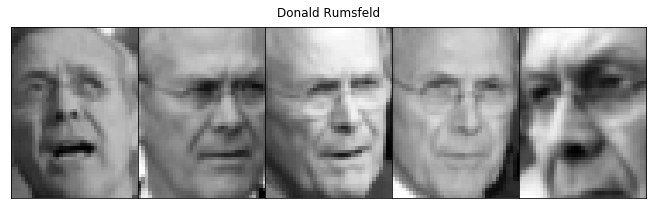

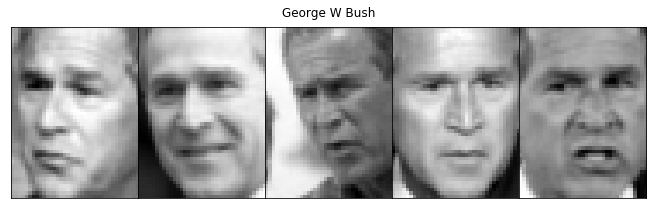

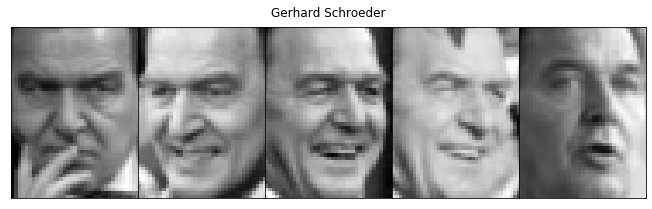

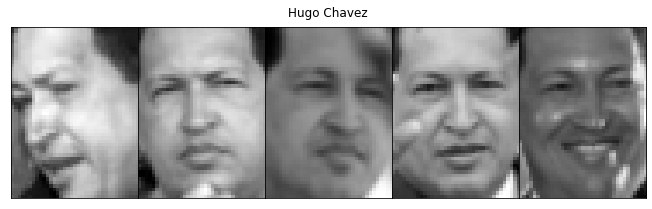

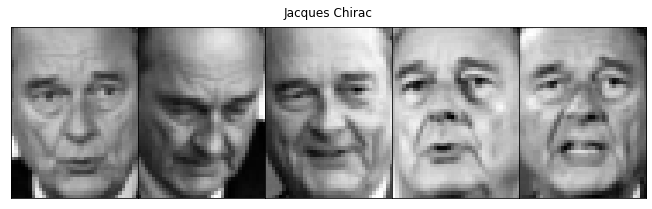

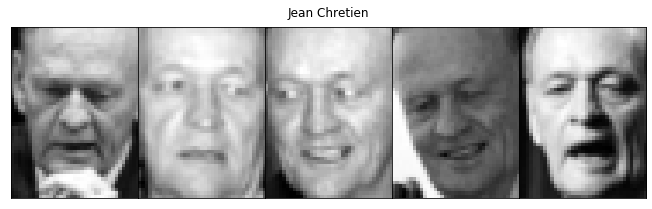

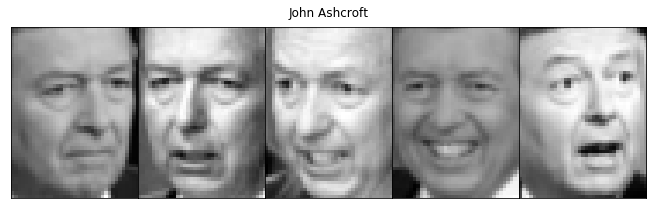

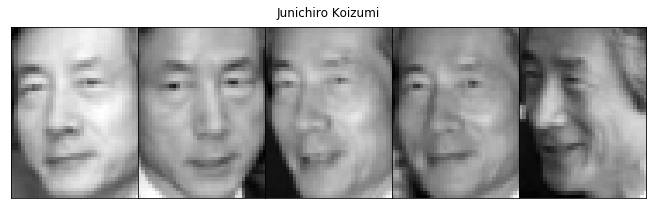

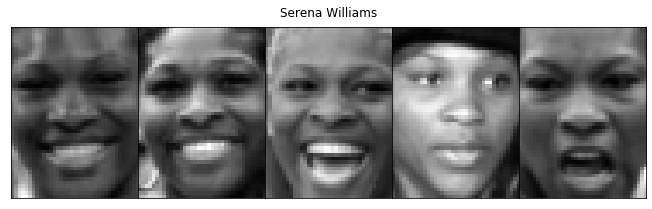

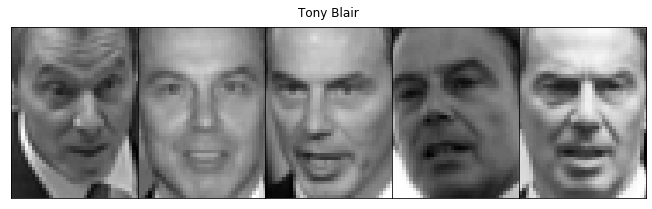

In [13]:
# Corsons un peu le problème:
# Pour chaque personnalité, affichez 5 photos de la base prises au hasard

for (i, name) in enumerate(d.target_names):
    plot_images(d.data[d.target == i], name,n_row=1, n_col=5)

# Exploitation simple d'une ACP (5 points)

## a. Apprentissage et reconstruction 

Dans les cellules suivantes, vous allez calculer une ACP sur ces données d'images.

Attention à la normalisation. Vous pouvez soit effectuer cette normalisation à la main, soit explorer un peu [la doc de sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

$\Rightarrow$ Appelez `data_pca` les données en basse dimension  
$\Rightarrow$ Appelez `reconstruction` le résultat de la fonction `pca.inverse_transform` appliqué à `data_pca`. De quoi s'agit-il ? Affichez le

In [14]:
# On telecharge le package scikit learn :
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

t = d.data

# On créer l'objet PCA :
t = StandardScaler().fit_transform(t)
comp=2
pca = PCA(n_components=comp) # On choisit de ne conserver que deux dimensions de notre ACP pour pouvoir les afficher,
# nous verrons par la suite s'il semble interessant d'en garder plus

# On entraine l'ACP sur les données
pca.fit(t);

# Calculez la transformée des images par ACP
data_pca = pca.transform(t) # Nous devrions dorénavant n'avoir plus que deux dimensions pour chaque image

# calculez la reconstruction correspondante
reconstruction = pca.inverse_transform(data_pca)
reconstruction

array([[-0.12686443, -0.18808599, -0.28439748, ..., -0.23044953,
        -0.2037357 , -0.17749524],
       [-0.3765076 , -0.42096868, -0.53082365, ...,  0.14531535,
         0.14879036,  0.16037072],
       [-0.534121  , -0.5441007 , -0.6318592 , ...,  0.526972  ,
         0.5025731 ,  0.49335206],
       ...,
       [-0.01964116,  0.02767767,  0.0855997 , ...,  0.30752558,
         0.28028706,  0.2569113 ],
       [ 0.1890566 ,  0.23207961,  0.3137826 , ...,  0.05210054,
         0.03892243,  0.02310866],
       [-0.11380234, -0.13011314, -0.16700071, ...,  0.0265675 ,
         0.0292044 ,  0.03409217]], dtype=float32)

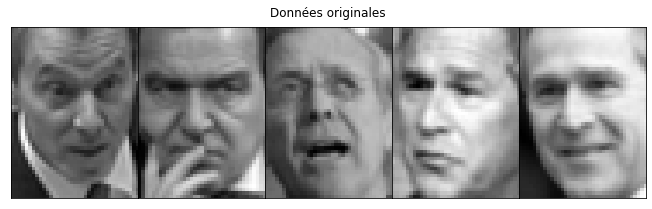

In [15]:
# Affichez sur une ligne les 5 premières images originales
original=d.data[:5] # On ne selectionne que les cinq premières images
plot_images(original, 'Données originales', n_col=5,n_row=1)

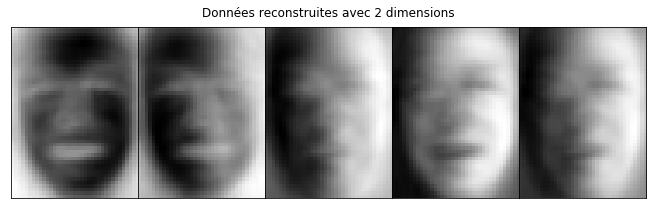

In [16]:
# Affichez sur une ligne leur reconstruction, en indiquant le nombre de composantes dans le titre
plot_images(reconstruction, 'Données reconstruites avec %d dimensions' % comp, n_col=5,n_row=1)

On constate qu'on ne distingue pas grand chose sur les images. Il faudrait peut être essayer avec plus de dimenesions.

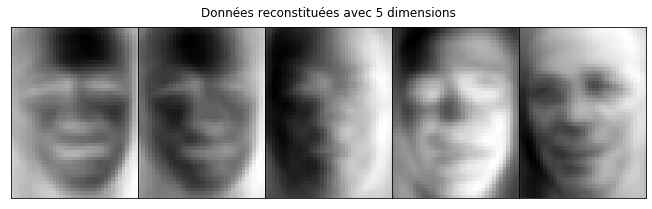

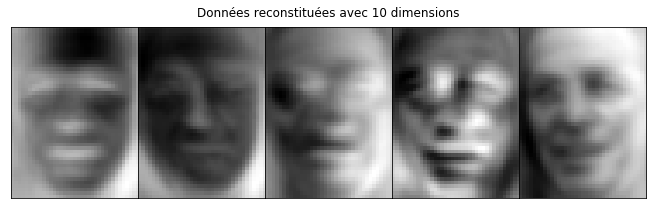

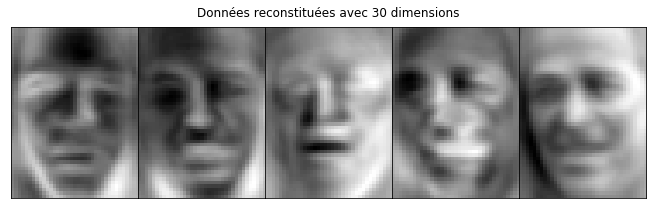

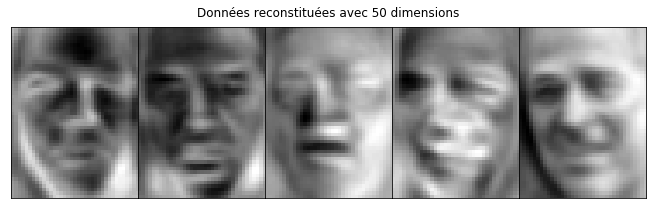

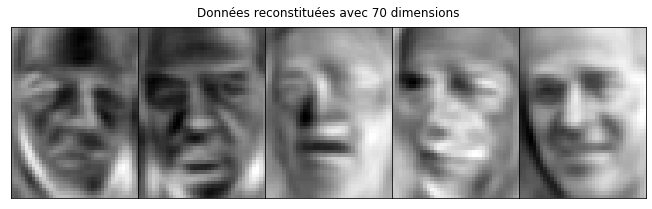

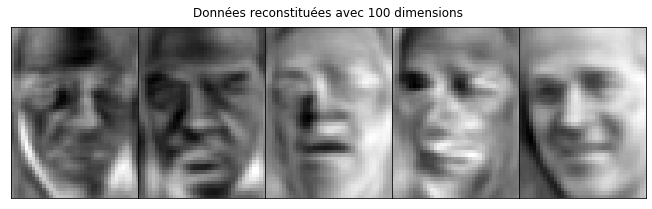

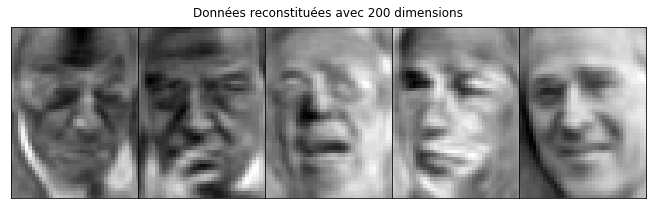

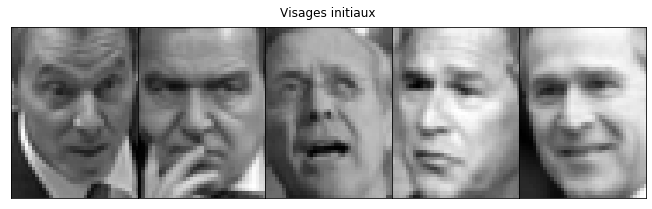

In [17]:
# Maintenant, pour les nombres de composantes suivants: 5, 10, 30, 50, 70, 100, 200, affichez les visages reconstruits sur une ligne
# puis les visages initiaux sur une ligne.
# Indice: vous avez deux options: réapprendre une ACP à chaque fois, ou bien réutiliser la même plusieurs fois.

ncomp = 0 

for ncomp in [5, 10, 30, 50, 70, 100, 200]:
    pca2 = PCA(n_components=ncomp)
    pca2.fit(t);
    data_pca2 = pca2.transform(t) 
    reconstruction2 = pca2.inverse_transform(data_pca2)
    plot_images(reconstruction2, 'Données reconstituées avec %d dimensions' %ncomp, n_row=1, n_col=5)
    
    
# Affichez sur une ligne les 5 premières images originales
plot_images(d.data, 'Visages initiaux', n_row=1, n_col=5)


## b. Affichages par scores

Voyons si le score donné par l'ACP de `scikit-learn` peut être interprétable.

> Affichez les $10$ échantillons avec le meilleur score et les $10$ avec les pires scores. Interprétez  

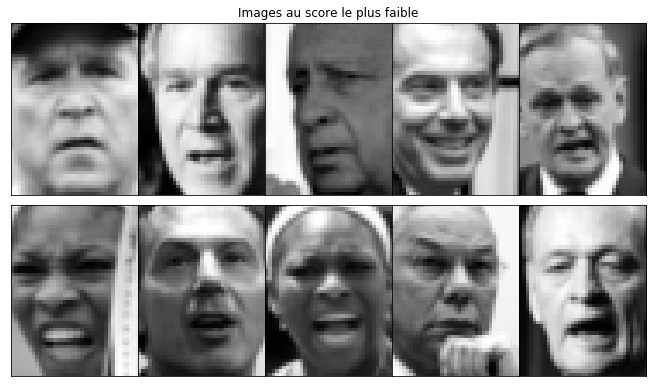

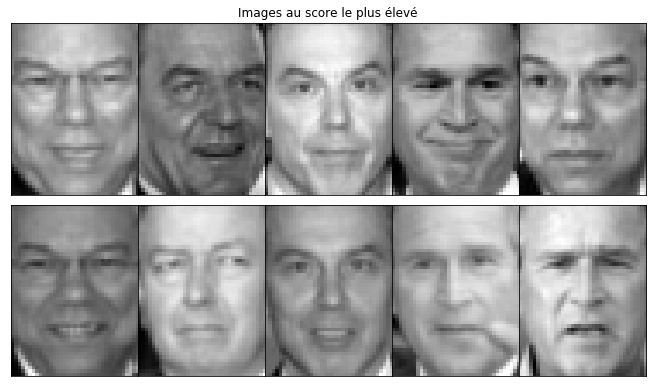

In [18]:
# extraction et tri des scores
score=np.argsort(pca.score_samples(t)) # on obtient le rang des images classées du moins bon score au meilleur
lmin = score[:10]
lmax = score[-10:]

# Afficher les 10 images avec le score le plus faible, et celles avec le score le plus élevé
plot_images(d.data[lmin], 'Images au score le plus faible',n_row=2, n_col=5)
plot_images(d.data[lmax], 'Images au score le plus élevé',n_row=2, n_col=5)

__Interprétation__  

Les visages ayant le score le plus élevé sont bien représentés dans le plan de projection des deux dimensions conservées, c'est à dire qu'ils contribuent également fortement à leur construction. Au contraire, les images avec le moins bon score sont certaintement ceux qui sont projetés proche de l'origine, donc mal représentées sur le plan.
Cette classification des visages avec le meilleur score et le moins bon score semble logique. En effet, les visages avec le score le plus faible ne sont pas très bien cadrés et souvent pas de face. Au contraire, les visages avec les meilleurs scores ont moins de bruit et sont tous de face. Il parait donc cohérent qu'il s'agisse de ceux qui sont le mieux expliqués par les composantes principales d'un jeu de données composé d'images de visages.


## b. Interprétation et discussion

Dans cette section, vous allez étudier certains paramètres appris par l'ACP, les afficher, et créer une cellule de texte où vous donnerez une discussion courte de ce qui vous semble pertinent.

> * Pour les affichages:  
>   $\Rightarrow$ utilisez `plt.plot`, `plt.grid`  
>   $\Rightarrow$ mettez des titres, nommez les axes
> * Pour les discussions:
>   concentrez vous sur l'essentiel: je ne noterai __PAS__ la quantité.

### `pca.explained_variance_ratio`

In [32]:
# Affichage de pca.explained_variance_ratio_, ainsi que de pca.explained_variance_ratio_.cumsum()
g=pandas.DataFrame(pca.explained_variance_ratio_)
g["Composante"]=[1,2] 
g.rename(columns={g.columns[0]:"Inertie"})

,Inertie,Composante
0,0.740714,1
1,0.123276,2


In [21]:
pca.explained_variance_ratio_.cumsum()

array([0.26820064, 0.41010547], dtype=float32)

__De quoi s'agit-il ?__  
Il s'agit de la variance expliquée par les dimensions de l'ACP (ou l'inertie du modèle): d'abord la variance expliquée par chacune des deux dimensions puis la variance cumulée expliquée par le modèle à 2 dimensions.

__Interprétez__  
La première composante explique donc 27% de l'information permettant de classer les images, la deuxième en explique 14%. Le modèle composé de ces deux dimensions explique donc 41% de l'inertie (ce qui est relativement faible...).

### `pca.components_`

(2, 1850)


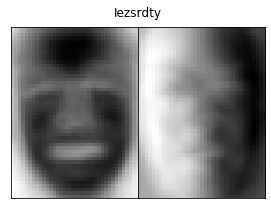

In [22]:
# Commencez par en affichez la dimension
print(pca.components_.shape)

# Cela devrait vous rappeler quelque chose. Affichez.
plot_images(pca.components_, 'Iezsrdty',n_row=1, n_col=2)


__De quoi s'agit-il ?__  
Il s'agit des vecteurs propres (matrice composante principale (ici 2) x pixels(1850)).
On parle également de "eigen faces"

__Interprétez__  
Comme on s'y attendait, la représentation de ces vecteurs propres montre des visages plutôt de face. La première composante semble marquer particulièrement la présence/la forme de la bouche et du contour du visage tandis que la deuxième composante  se focalise sur une moitié du visage / sa symétrie?

# Analyses des précipitations en France (7 points)

Dans cette section, nous allons appliquer une ACP aux données de précipitations dans les grandes villes de France, déjà vues lors du premier TP. Il s'agit de rajouter l'ACP à l'arsenal d'outils de visualisation que nous avons vus. 

In [23]:
# imports
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

# Chargeons les données
raw_data = pandas.read_csv('https://husson.github.io/img/pluie.csv',
                       encoding = "ISO-8859-1", sep=';')

# renommons la première colonne "Ville"
raw_data = raw_data.rename(columns = {raw_data.columns[0]:'Ville'})

# choisissons cette colonne en index
raw_data = raw_data.set_index('Ville')

## a. Utilisation simple ACP

Pour la suite:
1. Affichez une ACP des données de précipitations en 2D (deux composantes), avec pour chaque ville:
   * Son nom
   * La taille du point dépendant du volume total de précipitations
   * La couleur du point dépendant de la région.
2. Affichez une ACP du nombre de jours de pluie, calculée sur les colonnes (donc les mois), avec le nom des mois et la taille des points dépendants du nombre de jours de pluie moyen par mois. 

In [24]:
# ACP des précipitations par ville

# Extrayons les données de précipitations
data_columns = raw_data.columns[:12]
x = raw_data[data_columns]

# Maintenant, normalisons les données, c'est très simple avec scikit-learn
x = StandardScaler().fit_transform(x)

# Procédons à l'ACP, avec 2 composantes
n_components = 2

# Cela se fait en créant d'abord un objet de type `PCA`
pca = PCA(n_components=n_components)

# Puis de l'appliquer sur les données
pca.fit(x);

# appliquons l'ACP apprise
x_transformed = pca.transform(x)

# créons un DataFrame pandas pour ces données transformées, de manière à les afficher de manière pratique
pca_names = ['composante %d' % d for d in range(n_components)]
data_pca = pandas.DataFrame(x_transformed, 
                            index=raw_data.index,
                            columns=pca_names)

# rajoutons l'info de région et de précipitations annuelles des données initiales
data_pca['Précipitations annuelles'] = raw_data['Précipitations annuelles']
data_pca['Région'] = raw_data['Géographie']

# affichons les premiers échantillons
data_pca.head()

,composante 0,composante 1,Précipitations annuelles,Région
Ville,,,,
Ajaccio,-1.342505,3.772355,653.0,Sud
Angers,-1.095789,0.598962,690.0,Ouest
Angoulème,1.012135,-0.232093,826.0,Ouest
Besançon,4.387184,-2.976844,1088.0,Est
Biarritz,9.986850,-0.318951,1474.0,Ouest


In [25]:
!pip install adjustText
from adjustText import adjust_text

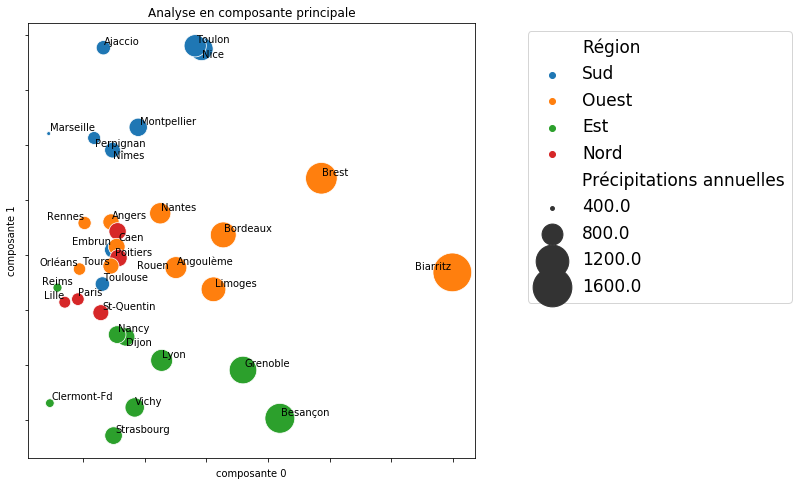

In [26]:
# Réalisons un affichage de nuage de points, où chaque donnée (ville) va apparaître 
g = sns.scatterplot(x='composante 0',
                y='composante 1',
                size='Précipitations annuelles',
                sizes=(15,1500),
                data=data_pca,
                hue='Région')

# on agrandit la figure, on annote...
g.figure.set_size_inches(8,8)
ax = plt.gca()
texts = []
for i, (text_x,text_y) in enumerate(data_pca.iloc[:,:2].to_numpy()):
  texts.append(ax.annotate(data_pca.index[i], (text_x,text_y)))
adjust_text(texts)

## on supprime les informations sur les axes, on rajoute un titre et une légende
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.title('Analyse en composante principale');
plt.gca().legend(prop={'size': 17}, bbox_to_anchor=(1.1, 1.0));

In [27]:
# ACP du nombre de jours de pluie par mois

months=['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet','Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# Extrayons les données de jours de pluie
data_columns = raw_data.columns[13:25]
x2 = raw_data[data_columns]
x2t=x2.T

# Maintenant, normalisons les données, c'est très simple avec scikit-learn
x2t = StandardScaler().fit_transform(x2t)

# Procédons à l'ACP, avec 2 composantes
n_components = 2

# Cela se fait en créant d'abord un objet de type `PCA`
pca = PCA(n_components=n_components)

# Puis de l'appliquer sur les données
pca.fit(x2t);

# appliquons l'ACP apprise
x2t_transformed = pca.transform(x2t)

# créons un DataFrame pandas pour ces données transformées, de manière à les afficher de manière pratique
pca_names = ['composante %d' % d for d in range(n_components)]
data_pca = pandas.DataFrame(x2t_transformed, 
                            index=months,
                            columns=pca_names)

# rajoutons l'info du nombre de jours de pluie moyen par mois
import numpy as np
moy=np.array(x2.mean())
data_pca['Nb de jours de pluie mensuel moyen'] = moy


# affichons les premiers échantillons
data_pca.head()

,composante 0,composante 1,Nb de jours de pluie mensuel moyen
Janvier,8.793374,3.117050,14.588235
Février,-0.111981,1.239214,11.941176
Mars,-2.971189,-2.724188,11.235294
Avril,-1.805804,-1.617416,11.470588
Mai,0.901976,-3.082390,12.205882


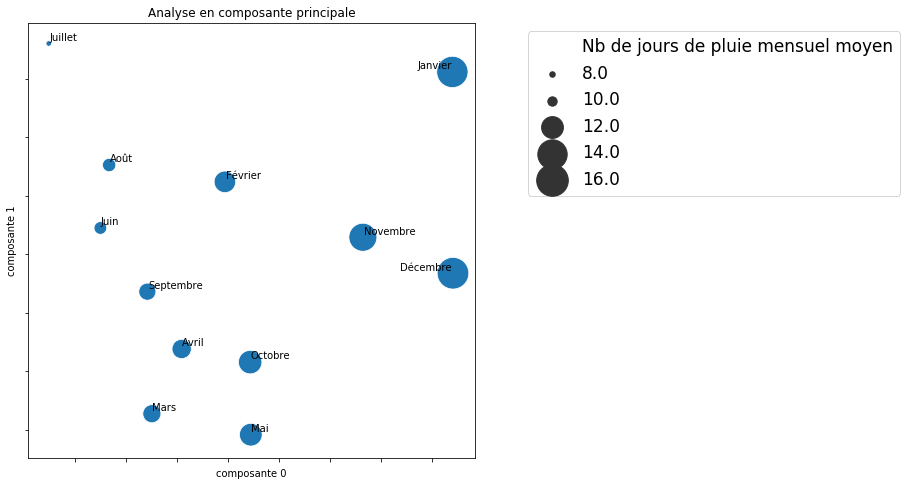

In [28]:
# Réalisons un affichage de nuage de points, où chaque donnée (mois) va apparaître 
g = sns.scatterplot(x='composante 0',
                y='composante 1',
                size='Nb de jours de pluie mensuel moyen',
                sizes=(30,1000),
                data=data_pca)

# on agrandit la figure, on annote...
g.figure.set_size_inches(8,8)
ax = plt.gca()
texts = []
for i, (text_x,text_y) in enumerate(data_pca.iloc[:,:2].to_numpy()):
  texts.append(ax.annotate(data_pca.index[i], (text_x,text_y)))
adjust_text(texts)

## on supprime les informations sur les axes, on rajoute un titre et une légende
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.title('Analyse en composante principale');
plt.gca().legend(prop={'size': 17}, bbox_to_anchor=(1.1, 1.0));